In [1]:
from matplotlib import pyplot as plt
import matplotlib.image as img 
import numpy as np
import pickle
import os
os.chdir('../lib')
from MF import *

# Matrix Factorization

Here, we used the latest small Movie-lens dataset to train the algorithms and compared the results.

+ Data set:

    610 users, 9724 movies and 100836 rating records

## SVD

In [2]:
# set up
svd = MF('../data/ratings.csv')
trainset, testset = svd.split(0.2)
svd.kfold_split(trainset)

###  biased SGD

In [3]:
# tuning parameters
reg_list = [0.1,0.15,0.2,0.25]
lr_list = [0.001,0.005, 0.01]
rank_list = [5,10,20]
svd.gridParams(algo = 'sgd',reg = reg_list, lr = lr_list, rank = rank_list)
# svd.tuningParams(trainset, verbose = False)

In [4]:
# save the best parameters
sgd_best_params = sgd.best_params
pickle.dump(sgd_best_params, open( "../output/sgd_best_params.p", "wb" ))
# sgd_best_params = pickle.load(open( "../output/sgd_best_params.p", "rb" ))
print("Best learning rate: {}; \nBest lambda: {}; \nBest rank: {}".format(sgd_best_params[0],sgd_best_params[1], sgd_best_params[2]))

Best learning rate: 0.001; 
Best lambda: 0.25; 
Best rank: 20


In [5]:
# SGD best model
svd.sgd(trainset, lr = sgd_best_params[0] ,reg = sgd_best_params[1], rank = sgd_best_params[2],elapse = True)
pickle.dump(svd, open( "../output/sgd_best_model.p", "wb" ))

Total time: 71.9886s


In [6]:
# test error
sgd_err = svd.err(testset, measure = 'rmse')
print(sgd_err)

0.018424169002607085


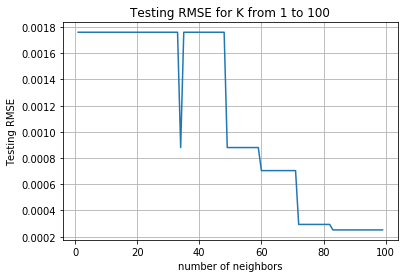

best K for SGD-KNN: 84


In [7]:
# find best K
K_err = []
K_num = [i for i in range(1,100)]
for k in K_num:
    K_err.append(svd.KNN(train = trainset, test = trainset, K = k))
plt.plot(K_num, K_err)
plt.xlabel("number of neighbors") 
plt.ylabel("Testing RMSE")
plt.title("Testing RMSE for K from 1 to 100")
plt.grid()
plt.savefig('../output/SGD-KNN.png', dpi=300, bbox_inches='tight')
plt.show()
sgd_best_K = np.argmin(K_err)+2
pickle.dump(sgd_best_K, open( "../output/sgd_knn_bestK.p", "wb" ))
# sgd_best_K = pickle.load(open( "../output/sgd_knn_bestK.p", "rb" ))
print("best K for SGD-KNN: {}".format(sgd_best_K))

In [8]:
# prediction error with KNN
sgd_knn_err = svd.KNN(train = trainset, test = testset, K = sgd_best_K)
print(sgd_knn_err)

0.0035207775636804306


### ALS

In [10]:
# tuning parameters
reg_list = [0.1,0.15,0.2,0.25]
rank_list = [5,10,20]
svd.gridParams(algo = 'als',reg = reg_list, rank = rank_list)
svd.tuningParams(trainset, measure = 'rmse', verbose = False)

In [11]:
# save parameters
als_best_params = als.best_params
pickle.dump(als_best_params, open( "../output/als_best_params.p", "wb" ))
# als_best_params = pickle.load(open( "../output/als_best_params.p", "rb" ))
print("Best lambda: {}; \nBest rank: {}".format(als_best_params[1], als_best_params[0]))

Best lambda: 0.1; 
Best rank: 5


In [12]:
# training best ALS model
svd.als(trainset, rank = als_best_params[0], reg = als_best_params[1],elapse = True)
pickle.dump(svd, open( "../output/als_best_model.p", "wb" ))

Total time: 20.8529s


In [13]:
# calculate test error
als_err = svd.err(testset, measure = 'rmse')
print(als_err)

1.3086509715004353


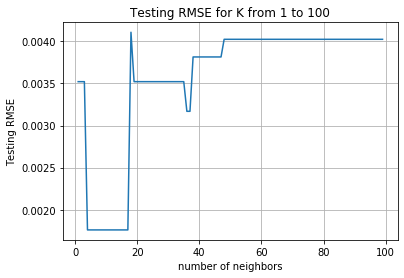

best K for ALS-KNN: 5


In [15]:
# find best K
K_err = []
K_num = [i for i in range(1,100)]
for k in K_num:
    K_err.append(svd.KNN(train = trainset, test = trainset, K = k))
plt.plot(K_num, K_err)
plt.xlabel("number of neighbors") 
plt.ylabel("Testing RMSE")
plt.title("Testing RMSE for K from 1 to 100")
plt.grid()
plt.savefig('../output/ALS-KNN_train.png', dpi=300, bbox_inches='tight')
plt.show()
best_K = np.argmin(K_err)+2
pickle.dump(best_K, open( "../output/als_knn_bestK.p", "wb" ))
# best_K = pickle.load(open( "../output/als_knn_bestK.p", "rb" ))
print("best K for ALS-KNN: {}".format(best_K))

In [16]:
# prediction error with KNN
als_knn_err = svd.KNN(train = trainset, test = testset, K = sgd_best_K)
print(als_knn_err)

0.010562332691041293
